<a href="https://colab.research.google.com/github/rajeevak40/Regression_using_TensorFlow/blob/main/Medical_cost_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import pandas as pd
from sklearn.model_selection import train_test_split

# Reading Data

In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/d20658ec6d336af2d4ddb5fd72b6f677dd46136e/insurance.csv')

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Preproecessing Data

In [ ]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
insurance1=pd.get_dummies(insurance)

In [ ]:
insurance1.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
y=insurance1.charges
X=insurance1.drop('charges', axis=1)

In [ ]:
y.head(), X.head()

(0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64,
    age     bmi  children  ...  region_northwest  region_southeast  region_southwest
 0   19  27.900         0  ...                 0                 0                 1
 1   18  33.770         1  ...                 0                 1                 0
 2   28  33.000         3  ...                 0                 1                 0
 3   33  22.705         0  ...                 1                 0                 0
 4   32  28.880         0  ...                 1                 0                 0
 
 [5 rows x 11 columns])

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create Model
insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(10, input_shape=(11,)))
insurance_model.add(tf.keras.layers.Dense(1))


# Compile modle
insurance_model.compile(optimizer='sgd',loss='mae')

# Model fit
insurance_model.fit(X_train,y_train, epochs= 100, verbose=0)

Epoch 1/100
34/34 [==============================] - 3s 2ms/step - loss: 8786.2920
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7745.8228
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7533.6680
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7773.1260
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7481.5259
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7734.1304
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7476.3071
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7476.6987
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.4077
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7628.4424
Epoch 11/100
34/34 [==============================] - 0s 2ms/step - loss: 7650.2192
Epoch 12/100
34/34 [==============================] - 0s 2ms/step - loss: 7614.7593
E

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6227.6821


6227.68212890625

In [ ]:
# Create Model 2
insurance_model_1 = tf.keras.Sequential()
insurance_model_1.add(tf.keras.layers.Dense(50, input_shape=(11,)))
insurance_model_1.add(tf.keras.layers.Dense(25))
insurance_model_1.add(tf.keras.layers.Dense(1))


# Compile modle
insurance_model_1.compile(optimizer='adam',loss='mae', metrics=['mse'])

# Model fit
insurance_model_1.fit(X_train,y_train, epochs= 100)

In [ ]:
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5010.6240 - mse: 103603856.0000


[5010.6240234375, 103603856.0]

In [ ]:
# Create Model 2
insurance_model_2 = tf.keras.Sequential()
insurance_model_2.add(tf.keras.layers.Dense(100, input_shape=(11,), activation='relu'))
insurance_model_2.add(tf.keras.layers.Dense(50, activation ='relu'))
insurance_model_2.add(tf.keras.layers.Dense(30, activation ='relu'))
insurance_model_2.add(tf.keras.layers.Dense(20, activation ='relu'))
insurance_model_2.add(tf.keras.layers.Dense(10, activation ='relu'))
insurance_model_2.add(tf.keras.layers.Dense(1))


# Compile modle
insurance_model_2.compile(optimizer='adam',loss='mae', metrics=['mae'])

# Model fit
insurance_model_2.fit(X_train,y_train, epochs= 100, verbose=0)

# Model Evaluation
insurance_model_2.evaluate(X_test, y_test)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13339.6719 - mae: 13339.6719
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13243.4492 - mae: 13243.4492
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12169.3232 - mae: 12169.3232
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 8240.2012 - mae: 8240.2012
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7412.7397 - mae: 7412.7397
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7360.0879 - mae: 7360.0879
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7304.9888 - mae: 7304.9888
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7237.4077 - mae: 7237.4077
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7179.3535 - mae: 7179.3535
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7108.0479 - mae: 710

[2506.933837890625, 2506.933837890625]

In [ ]:
# Create Model 3
insurance_model_3 = tf.keras.Sequential()
insurance_model_3.add(tf.keras.layers.Dense(100, input_shape=(11,), activation='relu'))
insurance_model_3.add(tf.keras.layers.Dense(50, activation ='relu'))
insurance_model_3.add(tf.keras.layers.Dense(30, activation ='relu'))
insurance_model_3.add(tf.keras.layers.Dense(20, activation ='relu'))
insurance_model_3.add(tf.keras.layers.Dense(10, activation ='relu'))
insurance_model_3.add(tf.keras.layers.Dense(1))


# Compile modle
insurance_model_3.compile(optimizer='adam',loss='mae', metrics=['mae'] )

# Model fit
history=insurance_model_3.fit(X_train,y_train, epochs= 500, verbose=0)

# Model Evaluation
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1645.3633 - mae: 1645.3633


[1645.36328125, 1645.36328125]

In [ ]:
#history.history.dtype()

In [ ]:
# Create Model 4
insurance_model_4 = tf.keras.Sequential()
insurance_model_4.add(tf.keras.layers.Dense(100, input_shape=(11,), activation='relu'))
insurance_model_4.add(tf.keras.layers.Dense(50, activation ='relu'))
insurance_model_4.add(tf.keras.layers.Dense(30, activation ='relu'))
insurance_model_4.add(tf.keras.layers.Dense(20, activation ='relu'))
insurance_model_4.add(tf.keras.layers.Dense(10, activation ='relu'))
insurance_model_4.add(tf.keras.layers.Dense(1))


# Compile modle
insurance_model_4.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.1),loss='mae', metrics=['mae'] )

# Model fit
history=insurance_model_4.fit(X_train,y_train, epochs= 500, verbose=0)

# Model Evaluation
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1558.6875 - mae: 1558.6875


[1558.6875, 1558.6875]

In [ ]:
loss=pd.DataFrame(history.history)

loss.plot()
plt.ylabel=('Loss')
plt.xlabel=('Epochs')
plt.show()

,loss,mae
0,9078.426758,9078.426758
1,6466.719727,6466.719727
2,5120.165039,5120.165039
3,4111.953125,4111.953125
4,3705.805664,3705.805664


# Standardisation  & Normanisation

In [ ]:
insurance1.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder



In [ ]:
scalar= MinMaxScaler()
scalar.fit(X_train)
X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)
X_test_scaled

array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.7826087 , 0.84611246, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.7173913 , 0.49071832, 0.2       , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# Create Model 5
tf.random.set_seed(42)
insurance_model_5 = tf.keras.Sequential()
insurance_model_5.add(tf.keras.layers.Dense(100, input_shape=(11,), activation='relu'))
insurance_model_5.add(tf.keras.layers.Dense(50, activation ='relu'))
insurance_model_5.add(tf.keras.layers.Dense(30, activation ='relu'))
insurance_model_5.add(tf.keras.layers.Dense(20, activation ='relu'))
insurance_model_5.add(tf.keras.layers.Dense(10, activation ='relu'))
insurance_model_5.add(tf.keras.layers.Dense(1))


# Compile modle
insurance_model_5.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.1),loss='mae', metrics=['mae'] )

# Model fit
history=insurance_model_5.fit(X_train_scaled,y_train, epochs= 500, verbose=0)

# Model Evaluation
insurance_model_5.evaluate(X_test_scaled, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1430.5508 - mae: 1430.5508


[1430.55078125, 1430.55078125]

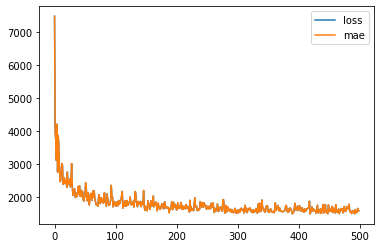

In [ ]:
pd.DataFrame(history.history) .plot() 